# PTS : Regression Linéaire
### Sommaire
[Partie 1 : Nettoyage du dataset](#partie1)

[Partie 2 : Quantification du dataset](#partie2)

[Partie 1 : Nettoyage et quantification du dataset](#partie3)

[Partie 2 : Quantification du dataset](#partie4)

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import re

# A faire : séparer HDD et SSD et storage type SSD et HDD pour prix qui soit positivement corrélé ?
# Séparer cpou freq ?

# Partie 1 : Nettoyage et quantification du dataset
<a id='partie1'></a>

### Ouverture

In [5]:
laptop_data = pd.read_csv('laptops_final.csv', sep=",", encoding='latin1')

In [39]:
laptop_data.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,SSD,HDD,FlashStorage,Hybird,GPU,Weight,Price (Euros)
0,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,0,0,128,0,Intel HD Graphics 6000,1.34kg,898.94
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.6GHz,8GB,0,0,128,0,Intel HD Graphics 6000,1.35kg,1099.00
2,Acer,Notebook,"11.6""",1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,0,0,128,0,Intel HD Graphics 405,1.4kg,485.00
3,Acer,Notebook,"14.0""",1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,0,0,128,0,Intel HD Graphics 405,1.6kg,349.00
4,Asus,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,128,0,0,Intel HD Graphics 620,2.3kg,590.00


In [9]:
laptop_data.shape

(1303, 16)

In [10]:
laptop_data.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
ScreenSize                   object
Screen                       object
CPU                          object
RAM                          object
SSD                           int64
HDD                           int64
FlashStorage                  int64
Hybird                        int64
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price (Euros)               float64
dtype: object

In [41]:
laptop_data.loc[0]

Manufacturer                      Apple
Category                      Ultrabook
ScreenSize                        13.3"
Screen                         1440x900
CPU                Intel Core i5 1.8GHz
RAM                                 8GB
SSD                                   0
HDD                                   0
FlashStorage                        128
Hybird                                0
GPU              Intel HD Graphics 6000
Weight                           1.34kg
Price (Euros)                    898.94
Name: 0, dtype: object

#### Suppression des colones inexploitables

In [12]:
#Suppression des colonnes inexploitables
laptop_data = laptop_data.drop('Model Name', axis=1)
laptop_data = laptop_data.drop('Operating System Version', axis=1) 
laptop_data = laptop_data.drop('Operating System', axis=1) 

laptop_data['Price (Euros)'] = laptop_data['Price (Euros)'].astype(str) # Transformation des prix en str pour la ligne suivante
laptop_data['Price (Euros)'] = laptop_data['Price (Euros)'].str.replace(',', '.').astype('float64') # Conversion des prix en float64

## Quantification du dataset

In [13]:
laptop_data_quantified = laptop_data.copy()

#### On attribue un nombre à chaque ligne de certaines colonnes

In [14]:
print((laptop_data_quantified['Category'].unique()))

laptop_data_quantified.Category[laptop_data_quantified.Category == 'Ultrabook'] = 1
laptop_data_quantified.Category[laptop_data_quantified.Category == 'Notebook'] = 2
laptop_data_quantified.Category[laptop_data_quantified.Category == 'Netbook'] = 3
laptop_data_quantified.Category[laptop_data_quantified.Category == 'Gaming'] = 4
laptop_data_quantified.Category[laptop_data_quantified.Category == '2 in 1 Convertible'] = 5
laptop_data_quantified.Category[laptop_data_quantified.Category == 'Workstation'] = 6

print((laptop_data_quantified['Manufacturer'].unique()))

laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Apple'] = 1
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'HP'] = 2
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Acer'] = 3
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Asus'] = 4
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Dell'] = 5
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Lenovo'] = 6
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Chuwi'] = 7
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'MSI'] = 8
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Microsoft'] = 9
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Toshiba'] = 10
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Huawei'] = 11
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Xiaomi'] = 12
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Vero'] = 13
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Razer'] = 14
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Mediacom'] = 15
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Samsung'] = 16
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Google'] = 17
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'Fujitsu'] = 18
laptop_data_quantified.Manufacturer[laptop_data_quantified.Manufacturer== 'LG'] = 19

['Ultrabook' 'Notebook' 'Netbook' '2 in 1 Convertible' 'Gaming'
 'Workstation']
['Apple' 'Acer' 'Asus' 'Dell' 'Lenovo' 'HP' 'Microsoft' 'Toshiba' 'Google'
 'MSI' 'Samsung' 'Fujitsu' 'Razer' 'Huawei' 'Xiaomi' 'Vero' 'Mediacom'
 'LG' 'Chuwi']


C:\Users\Zucc\AppData\Local\Temp\ipykernel_10940\1188909230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data_quantified.Category[laptop_data_quantified.Category == 'Ultrabook'] = 1
C:\Users\Zucc\AppData\Local\Temp\ipykernel_10940\1188909230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data_quantified.Category[laptop_data_quantified.Category == 'Notebook'] = 2
C:\Users\Zucc\AppData\Local\Temp\ipykernel_10940\1188909230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

#### Méthode moins laborieuse pour la suite de la quantification (plus de 100 CPU et GPU différents)

In [15]:
# En gros on met la lists de tous les CPU et les GPU dans une variable et on crée un dictionnaire vide. 
# Ensuite, la boucle va remplacer chaque CPU et GPU par un nombre dans le dictionnaire.
# Après on remplace les colonnes CPU et GPU dans notre dataset par leur nouvelle valeur numérique.

gpu_mapping = {} 
gpu = laptop_data_quantified['GPU'].unique()
cpu_mapping = {}
cpu = laptop_data_quantified['CPU'].unique()

for i, gpu in enumerate(gpu, start=1):
    #print(gpu, "=", i) # Pour le test : afficher quel GPU correspond à quel nombre
    gpu_mapping[gpu] = i

for i, cpu in enumerate(cpu, start=1):
    #print(cpu, "=", i)
    cpu_mapping[cpu] = i

laptop_data_quantified['GPU'] = laptop_data_quantified['GPU'].map(gpu_mapping)

laptop_data_quantified['CPU'] = laptop_data_quantified['CPU'].map(cpu_mapping)

#### Transformation de certaines colones

In [16]:
#On supprime les unités à la fin de la colone Weight, Screen Size et RAM
laptop_data_quantified['Weight'] = laptop_data_quantified['Weight'].str.replace('kg', '').str.replace('s', '').astype(float)
laptop_data_quantified['ScreenSize'] = laptop_data_quantified['ScreenSize'].str.replace('"', '').astype(float)
laptop_data_quantified['RAM'] = laptop_data_quantified['RAM'].str.replace('GB', '').str.replace('s', '').astype(float)

#Pour la colone ScreenSize, on supprime tout ce qu'il y a avant la taille avec re (module d'expressions régulières)
laptop_data_quantified['Screen'] = laptop_data_quantified['Screen'].apply(lambda x: re.findall('\d{4}x\d{4}|\d{4}x\d{3}', x)[0] if isinstance(x, str) else x)
#Ensuite on sépare la première taille de la deuxième
laptop_data_quantified['Screen'] = laptop_data_quantified['Screen'].str.split('x', n=1)
#Ensuite on fait la multiplication afin d'avoir un seul chiffre
laptop_data_quantified['Screen'] = laptop_data_quantified['Screen'].apply(lambda x: int(x[0]) * int(x[1]) if isinstance(x, list) and len(x) == 2 else x)

In [21]:
laptop_data_quantified.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,SSD,HDD,FlashStorage,Hybird,GPU,Weight,Price (Euros)
0,1,1,13.3,1296000,1,8.0,0,0,128,0,1,1.34,898.94
1,1,1,13.3,1296000,2,8.0,0,0,128,0,1,1.35,1099.00
2,3,2,11.6,1049088,3,4.0,0,0,128,0,2,1.40,485.00
3,3,2,14.0,1049088,3,4.0,0,0,128,0,2,1.60,349.00
4,4,2,15.6,2073600,4,8.0,0,128,0,0,3,2.30,590.00


<a id='partie2'></a>
# Partie 2 : Analyse exploratoire de données

In [21]:
laptop_data_quantified.describe()

,ScreenSize,Screen,CPU,RAM,SSD,HDD,FlashStorage,Hybird,GPU,Weight,Price (Euros)
count,1303.000000,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,2.168807e+06,28.185725,8.382195,183.046048,413.783576,4.555641,8.831926,21.208749,2.038734,1123.686992
std,1.426304,1.391292e+06,23.966135,5.084665,187.308110,515.818779,30.274090,92.567185,22.777411,0.665475,699.009043
min,10.100000,1.049088e+06,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.690000,174.000000
25%,14.000000,1.440000e+06,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.500000,599.000000
50%,15.600000,2.073600e+06,30.000000,8.000000,256.000000,0.000000,0.000000,0.000000,13.000000,2.040000,977.000000
75%,15.600000,2.073600e+06,33.000000,8.000000,256.000000,1000.000000,0.000000,0.000000,27.000000,2.300000,1487.880000
max,18.400000,8.294400e+06,118.000000,64.000000,1024.000000,2000.000000,512.000000,1000.000000,110.000000,4.700000,6099.000000


In [22]:
# Pairplot complet (très long à afficher)

sns.pairplot(laptop_data_quantified, hue="Price (Euros)")
plt.show()

KeyboardInterrupt: 

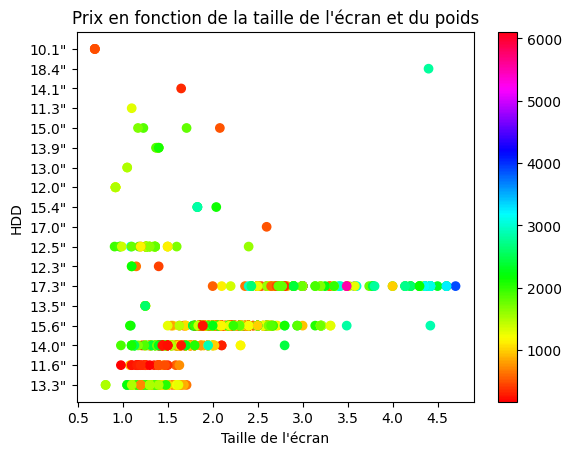

In [ ]:
plt.scatter(laptop_data_quantified['Weight'].values,laptop_data["ScreenSize"].values,c = laptop_data_quantified["Price (Euros)"].values, cmap='hsv')
plt.xlabel('Taille de l\'écran')
plt.ylabel('HDD')
plt.title('Prix en fonction de la taille de l\'écran et du poids')
plt.colorbar()
plt.show()

C:\Users\Zucc\AppData\Local\Temp\ipykernel_7364\3571809138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_data_quantified['Price (Euros)'])


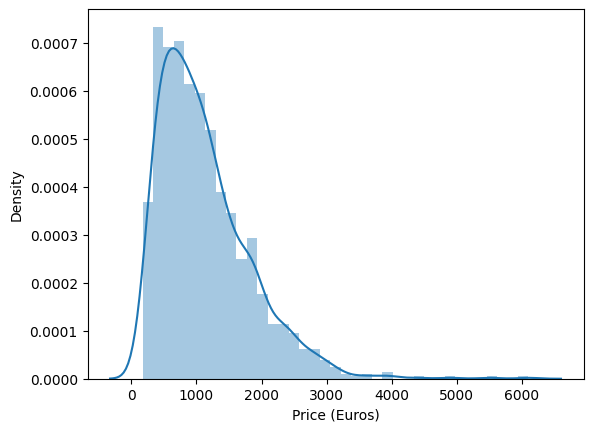

In [ ]:
sns.distplot(laptop_data_quantified['Price (Euros)'])
plt.show()

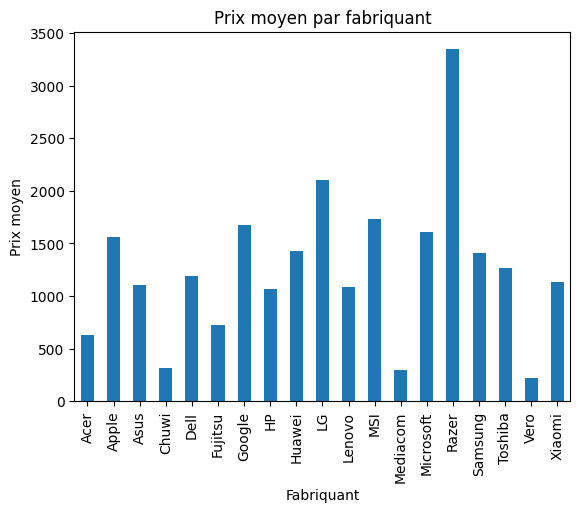

In [ ]:
# Regroupement des données par fabriquant et calcul du prix moyen pour chacun
manufacturer_mean_price = laptop_data.groupby('Manufacturer')['Price (Euros)'].mean()

manufacturer_mean_price.plot(kind='bar')
plt.xlabel('Fabriquant')
plt.ylabel('Prix moyen')
plt.title('Prix moyen par fabriquant')
plt.show()

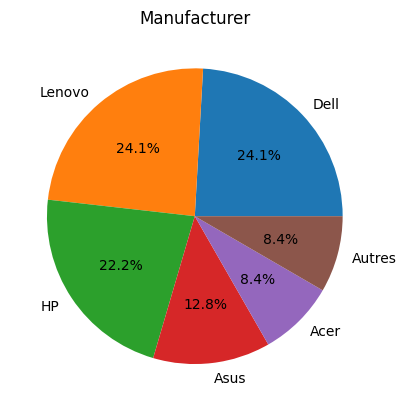

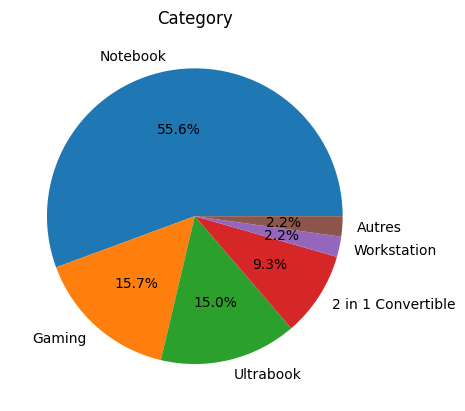

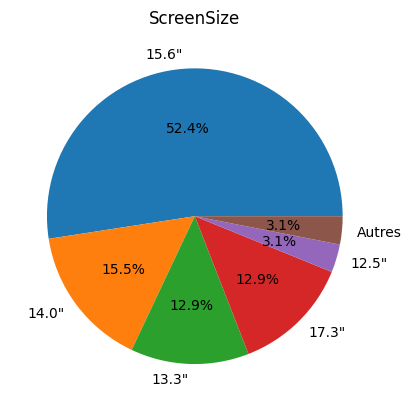

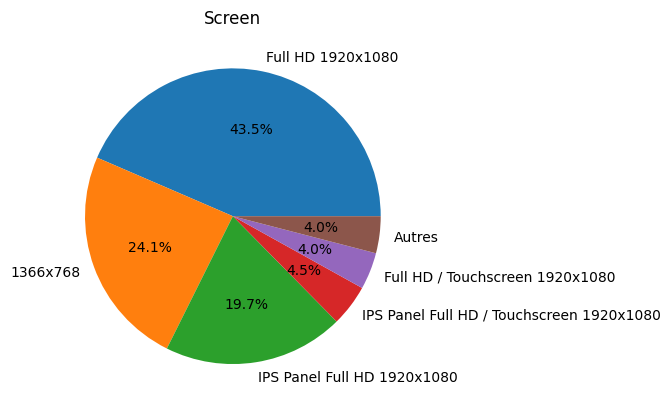

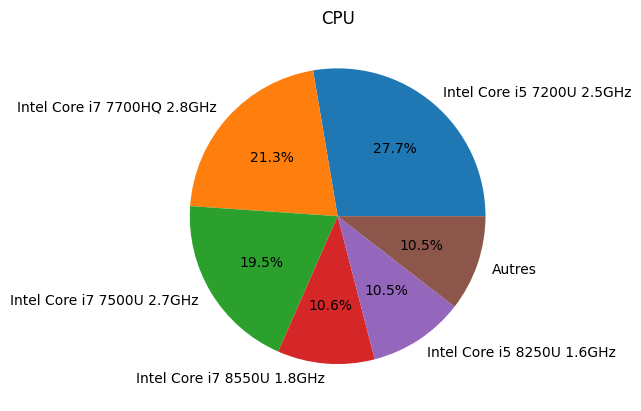

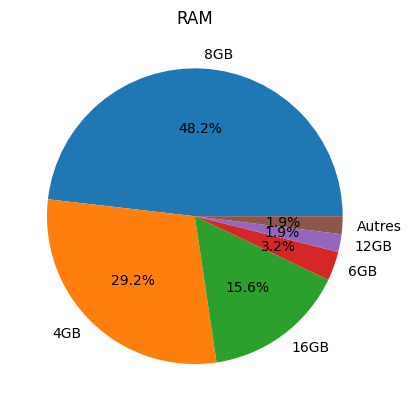

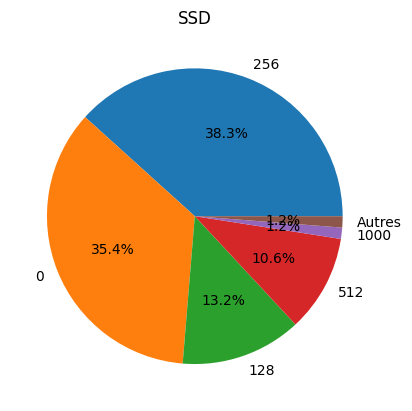

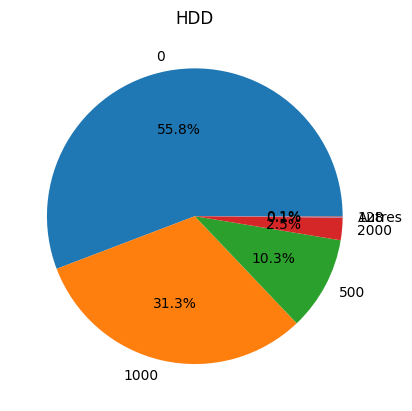

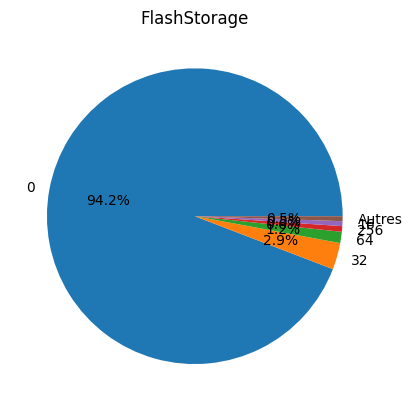

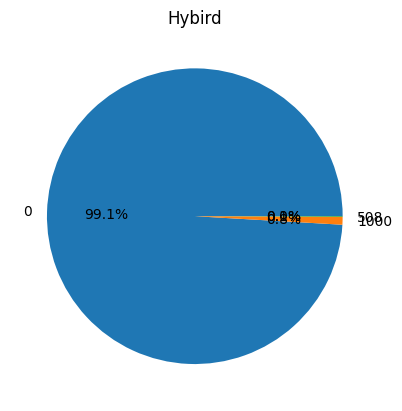

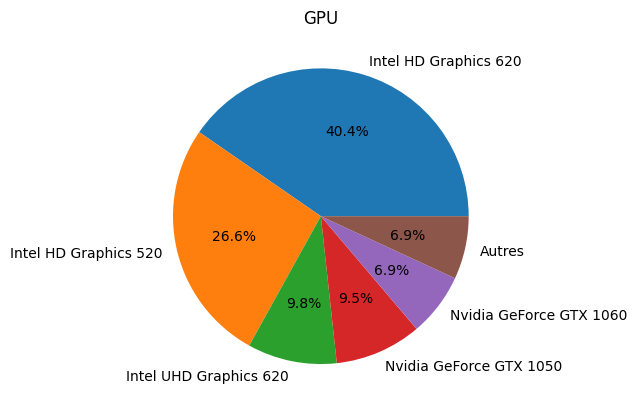

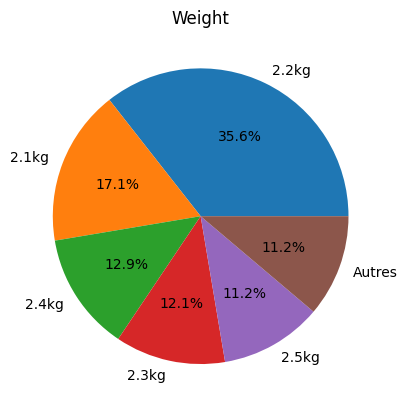

In [48]:
import matplotlib.pyplot as plt

for column in laptop_data.columns:
  if column != 'Price (Euros)' and column != 'ID':
      counts = laptop_data[column].value_counts().head(5)
      others = counts.sum() - counts.iloc[:4].sum()
      counts = pd.concat([counts, pd.Series([others], index=["Autres"])])
      counts.plot(kind='pie', autopct='%1.1f%%')
      plt.title(column)
      plt.show()


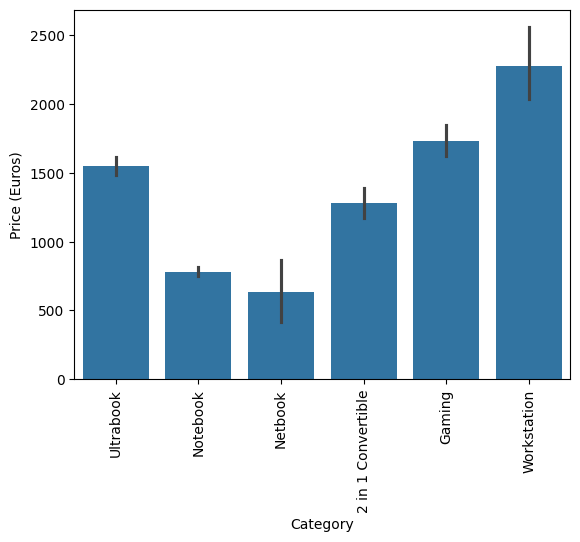

In [ ]:
#data['TypeName'].value_counts().plot(kind='bar')
sns.barplot(x=laptop_data['Category'], y=laptop_data_quantified['Price (Euros)'])
plt.xticks(rotation="vertical")
plt.show()

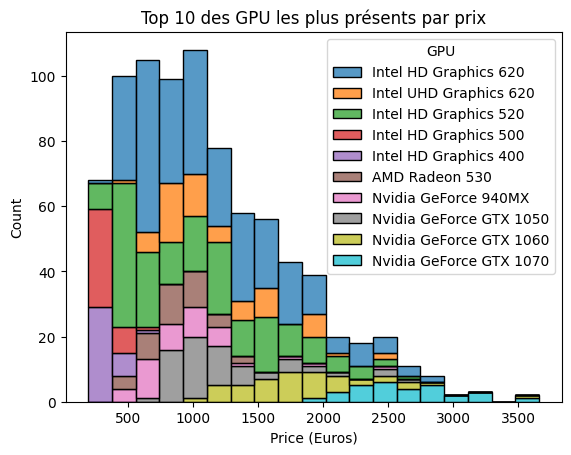

In [ ]:
# Séparation du top 10 des GPU (sinon le graphique est illisible)
top_10_gpus = laptop_data['GPU'].value_counts().head(10).index.tolist()

# Nouveau dataframe avec uniquement les 10 GPU les plus fréquents
laptop_data_top_10_gpus = laptop_data[laptop_data['GPU'].isin(top_10_gpus)]

sns.histplot(data=laptop_data_top_10_gpus, x='Price (Euros)', hue='GPU', multiple='stack')
plt.title('Top 10 des GPU les plus présents par prix')
plt.show()

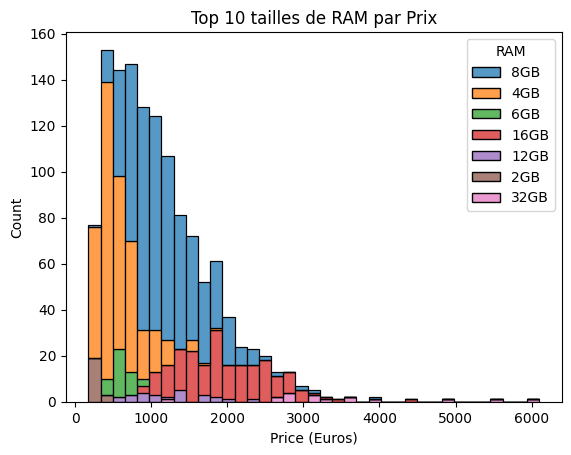

In [ ]:
#Pareil pour la RAM
ram_counts = laptop_data['RAM'].value_counts()

laptop_data_filtered_ram = laptop_data[laptop_data['RAM'].isin(ram_counts[ram_counts >= 10].index)]

sns.histplot(data=laptop_data_filtered_ram, x='Price (Euros)', hue='RAM', multiple='stack')
plt.title('Top 10 tailles de RAM par Prix')
plt.show()

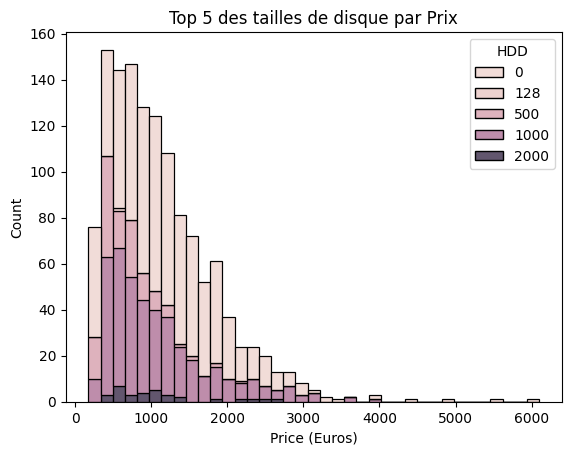

In [ ]:
# Pareil pour le stockage
storage_counts = laptop_data['HDD'].value_counts()

top_5_storage = storage_counts.head(5).index.tolist()
laptop_data_filtered_storage = laptop_data[laptop_data['HDD'].isin(top_5_storage)]

sns.histplot(data=laptop_data_filtered_storage, x='Price (Euros)', hue='HDD', multiple='stack')
plt.title('Top 5 des tailles de disque par Prix')
plt.show()

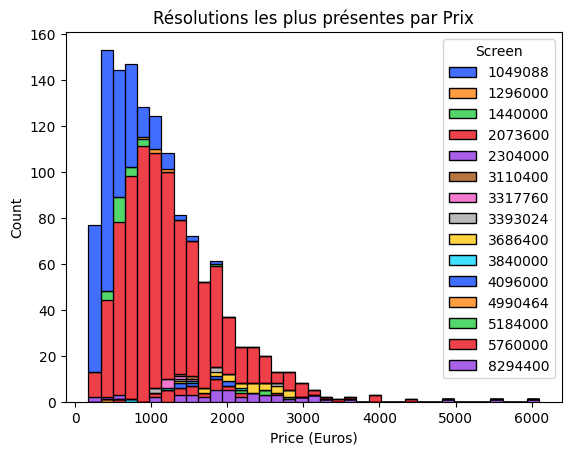

In [ ]:
sns.histplot(data=laptop_data_quantified, x='Price (Euros)', hue='Screen', multiple='stack', palette='bright')
plt.title('Résolutions les plus présentes par Prix')
plt.show()

On constate déjà que la majorité des ordinateurs sont des notebooks. Ensuite, nous avons 15% d'ordinateurs de jeu, 15% d'Ultrabook, 10% d'ordinateurs convertibles et une minorité de Workstations et de Netbook.
Le prix moyen des ordinateurs est de 1123€ avec une médiane à 977€.

Au niveau des prix moyens par rapport au constructeur, on constate que Razer est de loin la marque la plus chère, normal puisque c'est une marque d'ordinateurs de jeu, nécéssitant les composants les plus chers. Nous avons ensuite les PC de LG et de MSI/Google. Les ordinateurs les moins chers du lot sont les Chuwi, les Mediacom et les Vero.

Au niveau de la taille d'écran, la majorité sont de 15,6", qui semble être la norme de nos jours.
De même, la majorité sont en Full HD, et 17% sont en IPS.

Pour les CPU, malgré la très grande diversité, 15% d'entre eux sont des Intel core i5-7200U
Pour la RAM, la majorité des PC ont 8GB. Ce dataset datant d'il y a au moins 4 ans, la norme n'était pas encore de 16GB.
Pour le stockage, 31% des PC ont 256Gb de SSD et 17% ont 1TB de HDD mais seuls 5% ont les deux en même temps.
Près d'1/3 des PC ont uniquement le processeur graphique intégré au CPU. De plus, plus on monte en prix de cartes graphiques dédiées, moins il y a de PC qui en ont.
90% des PC sont sous Windows, cohérant car on a une minorité de produits Apple et de Chromebook dans notre dataset

Quant au poids, 10% des PC font 2.2Kg.


Rouge = 1920*1080, bleu = 1366*768.

In [ ]:
laptop_data_quantified.corr()['Price (Euros)'].sort_values(ascending=False)

Price (Euros)      1.000000
RAM                0.743007
SSD                0.669709
Screen             0.515486
Category           0.292191
CPU                0.263000
GPU                0.234405
Weight             0.210370
Manufacturer       0.149303
ScreenSize         0.068197
Hybird             0.007989
FlashStorage      -0.040511
HDD               -0.096441
OperatingSystem   -0.151308
Name: Price (Euros), dtype: float64

On voit déjà que la corrélation entre le prix du PC et la taille de la RAM est fortement positive.

<Axes: xlabel='RAM', ylabel='Price (Euros)'>

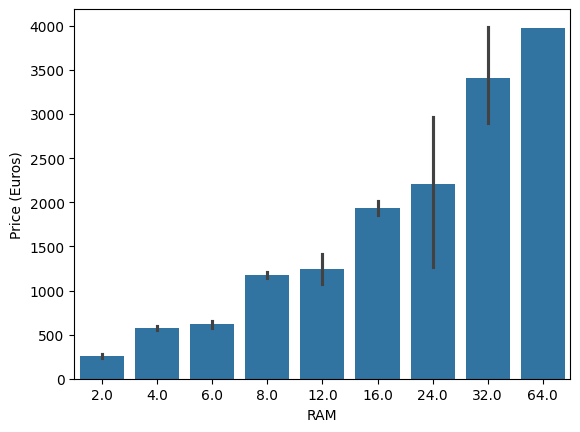

In [ ]:
order = laptop_data_quantified['RAM'].sort_values(ascending=True).unique()
sns.barplot(x=laptop_data_quantified['RAM'], y=laptop_data_quantified['Price (Euros)'], order=order)

<Axes: xlabel='Screen', ylabel='Price (Euros)'>

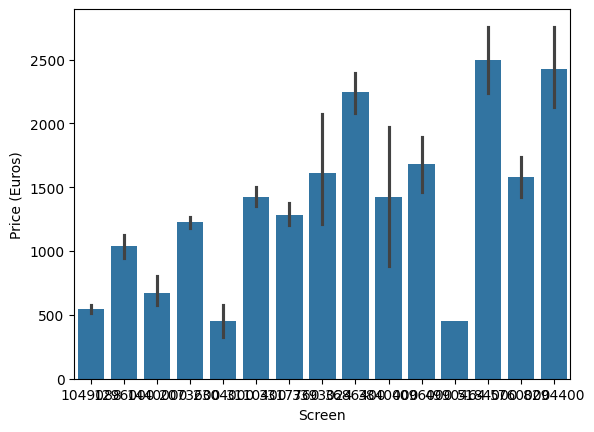

In [ ]:
order_screen = laptop_data_quantified['Screen'].sort_values(ascending=True).unique()
sns.barplot(x=laptop_data_quantified['Screen'], y=laptop_data_quantified['Price (Euros)'], order=order_screen)

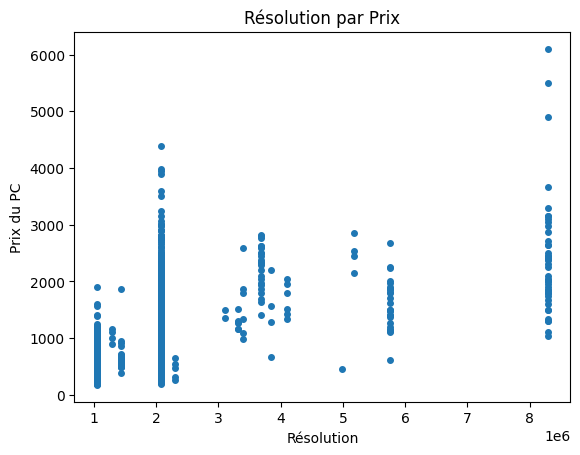

In [ ]:
plt.plot(laptop_data_quantified['Screen'], laptop_data_quantified['Price (Euros)'], 'o', markersize=4)
plt.xlabel('Résolution')
plt.ylabel('Prix du PC')
plt.title('Résolution par Prix')
plt.show()

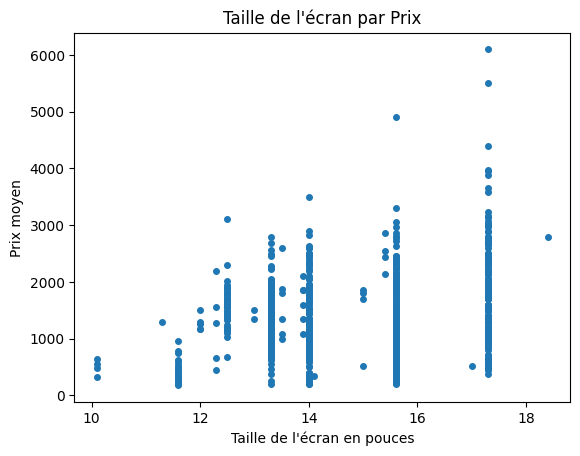

In [ ]:
plt.plot(laptop_data_quantified['ScreenSize'], laptop_data_quantified['Price (Euros)'], 'o', markersize=4)
plt.xlabel('Taille de l\'écran en pouces')
plt.ylabel('Prix moyen')
plt.title('Taille de l\'écran par Prix')
plt.show()

Il y a une corrélation faible mais positive entre la taille d'écran et le prix

In [ ]:
# Matrice de covariance

cov_mat = laptop_data_quantified.cov()
cov_mat

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,SSD,HDD,FlashStorage,Hybird,GPU,OperatingSystem,Weight,Price (Euros)
Manufacturer,7.572157,0.049251,-0.222225,2.754218e+05,4.177640e+00,2.082844e+00,6.770701e+01,-8.921196e+01,-7.358927,-1.099976e+00,-1.825615e+00,0.058512,-0.108541,2.871853e+02
Category,0.049251,1.688446,0.262409,2.072867e+05,4.423694e+00,1.818421e+00,2.909596e+01,9.132365e+01,-3.028380,1.273945e+00,6.179814e+00,0.038510,0.278430,2.653955e+02
ScreenSize,-0.222225,0.262409,2.034343,-1.714510e+05,-2.898587e+00,1.725990e+00,-2.772737e+01,3.904962e+02,-9.922923,7.138375e+00,8.915456e+00,-0.177763,0.785562,6.799204e+01
Screen,275421.811559,207286.676970,-171451.022029,1.935695e+12,6.491415e+06,2.803941e+06,1.265684e+08,-8.299558e+07,23672.268420,-1.241237e+06,4.569355e+06,-85203.711930,-40769.551603,5.013239e+08
CPU,4.177640,4.423694,-2.898587,6.491415e+06,5.743756e+02,2.588288e+01,8.485260e+02,-1.067302e+03,102.821455,4.701281e+01,2.141632e+02,1.001074,-0.382742,4.405915e+03
RAM,2.082844,1.818421,1.725990,2.803941e+06,2.588288e+01,2.585381e+01,5.752159e+02,2.525405e+02,-9.263217,1.810269e+01,2.733797e+01,-0.447664,1.298921,2.640816e+03
SSD,67.707009,29.095958,-27.727367,1.265684e+08,8.485260e+02,5.752159e+02,3.508433e+04,-3.828196e+04,-834.532518,-1.028029e+03,3.326532e+02,-21.994694,-7.482862,8.768502e+04
HDD,-89.211959,91.323650,390.496197,-8.299558e+07,-1.067302e+03,2.525405e+02,-3.828196e+04,2.660690e+05,-1837.342019,-3.657313e+03,1.127796e+03,-20.140300,176.606408,-3.477295e+04
FlashStorage,-7.358927,-3.028380,-9.922923,2.367227e+04,1.028215e+02,-9.263217e+00,-8.345325e+02,-1.837342e+03,916.520519,-4.026599e+01,5.061203e+01,2.951176,-3.624703,-8.572915e+02
Hybird,-1.099976,1.273945,7.138375,-1.241237e+06,4.701281e+01,1.810269e+01,-1.028029e+03,-3.657313e+03,-40.265987,8.568684e+03,9.445293e+01,-1.044636,5.861638,5.169555e+02


In [ ]:
# Matrice de corrélation

cor_mat = laptop_data_quantified.cov()
cor_mat

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,SSD,HDD,FlashStorage,Hybird,GPU,OperatingSystem,Weight,Price (Euros)
Manufacturer,7.572157,0.049251,-0.222225,2.754218e+05,4.177640e+00,2.082844e+00,6.770701e+01,-8.921196e+01,-7.358927,-1.099976e+00,-1.825615e+00,0.058512,-0.108541,2.871853e+02
Category,0.049251,1.688446,0.262409,2.072867e+05,4.423694e+00,1.818421e+00,2.909596e+01,9.132365e+01,-3.028380,1.273945e+00,6.179814e+00,0.038510,0.278430,2.653955e+02
ScreenSize,-0.222225,0.262409,2.034343,-1.714510e+05,-2.898587e+00,1.725990e+00,-2.772737e+01,3.904962e+02,-9.922923,7.138375e+00,8.915456e+00,-0.177763,0.785562,6.799204e+01
Screen,275421.811559,207286.676970,-171451.022029,1.935695e+12,6.491415e+06,2.803941e+06,1.265684e+08,-8.299558e+07,23672.268420,-1.241237e+06,4.569355e+06,-85203.711930,-40769.551603,5.013239e+08
CPU,4.177640,4.423694,-2.898587,6.491415e+06,5.743756e+02,2.588288e+01,8.485260e+02,-1.067302e+03,102.821455,4.701281e+01,2.141632e+02,1.001074,-0.382742,4.405915e+03
RAM,2.082844,1.818421,1.725990,2.803941e+06,2.588288e+01,2.585381e+01,5.752159e+02,2.525405e+02,-9.263217,1.810269e+01,2.733797e+01,-0.447664,1.298921,2.640816e+03
SSD,67.707009,29.095958,-27.727367,1.265684e+08,8.485260e+02,5.752159e+02,3.508433e+04,-3.828196e+04,-834.532518,-1.028029e+03,3.326532e+02,-21.994694,-7.482862,8.768502e+04
HDD,-89.211959,91.323650,390.496197,-8.299558e+07,-1.067302e+03,2.525405e+02,-3.828196e+04,2.660690e+05,-1837.342019,-3.657313e+03,1.127796e+03,-20.140300,176.606408,-3.477295e+04
FlashStorage,-7.358927,-3.028380,-9.922923,2.367227e+04,1.028215e+02,-9.263217e+00,-8.345325e+02,-1.837342e+03,916.520519,-4.026599e+01,5.061203e+01,2.951176,-3.624703,-8.572915e+02
Hybird,-1.099976,1.273945,7.138375,-1.241237e+06,4.701281e+01,1.810269e+01,-1.028029e+03,-3.657313e+03,-40.265987,8.568684e+03,9.445293e+01,-1.044636,5.861638,5.169555e+02


In [ ]:
# Matrice de détermination

det_mat = cor_mat**2
det_mat

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,SSD,HDD,FlashStorage,Hybird,GPU,OperatingSystem,Weight,Price (Euros)
Manufacturer,5.733756e+01,2.425625e-03,4.938399e-02,7.585717e+10,1.745267e+01,4.338241e+00,4.584239e+03,7.958774e+03,5.415381e+01,1.209947e+00,3.332868e+00,3.423657e-03,1.178124e-02,8.247540e+04
Category,2.425625e-03,2.850848e+00,6.885859e-02,4.296777e+10,1.956907e+01,3.306655e+00,8.465748e+02,8.340009e+03,9.171082e+00,1.622937e+00,3.819010e+01,1.483045e-03,7.752341e-02,7.043475e+04
ScreenSize,4.938399e-02,6.885859e-02,4.138552e+00,2.939545e+10,8.401806e+00,2.979041e+00,7.688069e+02,1.524873e+05,9.846441e+01,5.095640e+01,7.948536e+01,3.159968e-02,6.171075e-01,4.622917e+03
Screen,7.585717e+10,4.296777e+10,2.939545e+10,3.746913e+24,4.213847e+13,7.862086e+12,1.601955e+16,6.888267e+15,5.603763e+08,1.540669e+12,2.087901e+13,7.259673e+09,1.662156e+09,2.513257e+17
CPU,1.745267e+01,1.956907e+01,8.401806e+00,4.213847e+13,3.299074e+05,6.699234e+02,7.199964e+05,1.139134e+06,1.057225e+04,2.210204e+03,4.586588e+04,1.002149e+00,1.464911e-01,1.941208e+07
RAM,4.338241e+00,3.306655e+00,2.979041e+00,7.862086e+12,6.699234e+02,6.684197e+02,3.308733e+05,6.377672e+04,8.580720e+01,3.277073e+02,7.473649e+02,2.004027e-01,1.687195e+00,6.973908e+06
SSD,4.584239e+03,8.465748e+02,7.688069e+02,1.601955e+16,7.199964e+05,3.308733e+05,1.230910e+09,1.465508e+09,6.964445e+05,1.056844e+06,1.106582e+05,4.837666e+02,5.599322e+01,7.688664e+09
HDD,7.958774e+03,8.340009e+03,1.524873e+05,6.888267e+15,1.139134e+06,6.377672e+04,1.465508e+09,7.079272e+10,3.375826e+06,1.337594e+07,1.271925e+06,4.056317e+02,3.118982e+04,1.209158e+09
FlashStorage,5.415381e+01,9.171082e+00,9.846441e+01,5.603763e+08,1.057225e+04,8.580720e+01,6.964445e+05,3.375826e+06,8.400099e+05,1.621350e+03,2.561578e+03,8.709441e+00,1.313847e+01,7.349487e+05
Hybird,1.209947e+00,1.622937e+00,5.095640e+01,1.540669e+12,2.210204e+03,3.277073e+02,1.056844e+06,1.337594e+07,1.621350e+03,7.342234e+07,8.921356e+03,1.091265e+00,3.435880e+01,2.672430e+05


<Axes: >

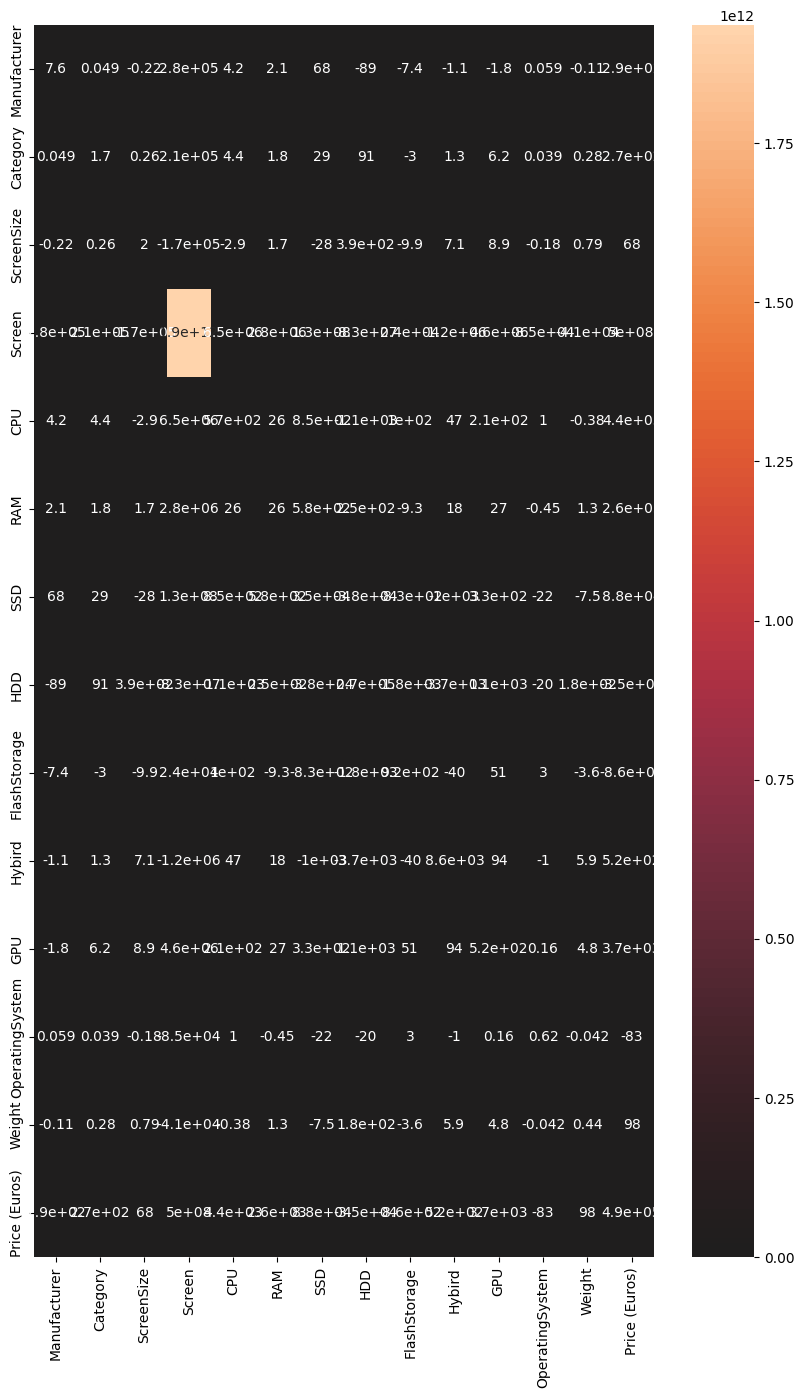

In [ ]:
# Heatmap matrice de corrélation

plt.figure(figsize=(10, 16))
sns.heatmap(cor_mat, annot=True, center=0)

<Axes: >

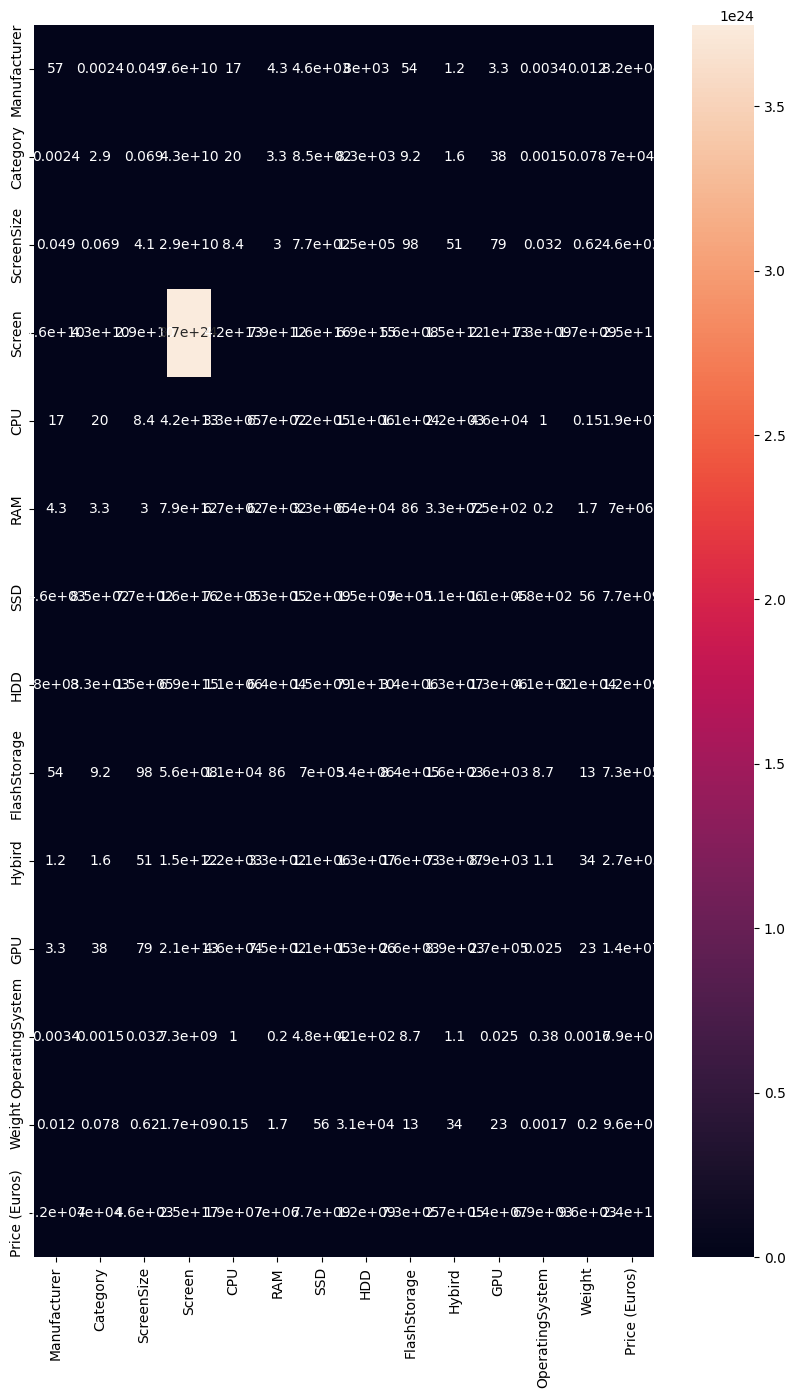

In [ ]:
# Heatmap détermination

plt.figure(figsize=(10, 16))
sns.heatmap(det_mat,annot=True)

In [ ]:
#test de chi2

chi2, p, dof, ex = chi2_contingency(tab_croise)
[chi2, p, dof, ex]

[11101.713844867088,
 0.0,
 2890,
 array([[0.01227936, 0.00613968, 0.00306984, ..., 0.00306984, 0.01227936,
         0.00306984],
        [0.00306984, 0.00153492, 0.00076746, ..., 0.00076746, 0.00306984,
         0.00076746],
        [0.10130468, 0.05065234, 0.02532617, ..., 0.02532617, 0.10130468,
         0.02532617],
        ...,
        [0.00306984, 0.00153492, 0.00076746, ..., 0.00076746, 0.00306984,
         0.00076746],
        [0.50345357, 0.25172678, 0.12586339, ..., 0.12586339, 0.50345357,
         0.12586339],
        [0.00306984, 0.00153492, 0.00076746, ..., 0.00076746, 0.00306984,
         0.00076746]])]

In [ ]:
#calcul des résidus

res_norm=(tab_croise-ex)/(ex**0.5)
res_norm

Weight,0.69,0.81,0.91,0.92,0.97,0.98,0.99,1.05,1.08,1.09,...,4.14,4.20,4.30,4.33,4.36,4.40,4.42,4.50,4.60,4.70
ScreenSize,,,,,,,,,,,,,,,,,,,,,
10.1,35.986279,-0.078356,-0.055406,-0.135717,-0.078356,-0.078356,-0.055406,-0.146591,-0.078356,-0.078356,...,-0.095966,-0.095966,-0.110812,-0.055406,-0.110812,-0.055406,-0.183761,-0.055406,-0.110812,-0.055406
11.3,-0.055406,-0.039178,-0.027703,-0.067858,-0.039178,-0.039178,-0.027703,-0.073295,-0.039178,-0.039178,...,-0.047983,-0.047983,-0.055406,-0.027703,-0.055406,-0.027703,-0.091881,-0.027703,-0.055406,-0.027703
11.6,-0.318284,-0.225061,-0.159142,-0.389817,-0.225061,4.218184,-0.159142,-0.421050,4.218184,-0.225061,...,-0.275642,-0.275642,-0.318284,-0.159142,-0.318284,-0.159142,-0.527814,-0.159142,-0.318284,-0.159142
12.0,-0.135717,-0.095966,-0.067858,35.930873,-0.095966,-0.095966,-0.067858,-0.179536,-0.095966,-0.095966,...,-0.117534,-0.117534,-0.135717,-0.067858,-0.135717,-0.067858,-0.225061,-0.067858,-0.135717,-0.067858
12.3,-0.123892,-0.087605,-0.061946,-0.151736,-0.087605,-0.087605,-0.061946,-0.163894,-0.087605,-0.087605,...,-0.107294,-0.107294,-0.123892,-0.061946,-0.123892,-0.061946,-0.205451,-0.061946,-0.123892,-0.061946
12.5,-0.346011,-0.244667,5.607155,-0.423775,7.929715,-0.244667,5.607155,-0.457730,-0.244667,3.842524,...,-0.299654,-0.299654,-0.346011,-0.173006,-0.346011,-0.173006,-0.573795,-0.173006,-0.346011,-0.173006
13.0,-0.078356,-0.055406,-0.039178,-0.095966,-0.055406,-0.055406,-0.039178,19.191052,-0.055406,-0.055406,...,-0.067858,-0.067858,-0.078356,-0.039178,-0.078356,-0.039178,-0.129939,-0.039178,-0.078356,-0.039178
13.3,-0.709545,3.484533,-0.354772,-0.869011,-0.501724,-0.501724,-0.354772,4.388221,-0.501724,-0.501724,...,-0.614484,-0.614484,-0.709545,-0.354772,-0.709545,-0.354772,-1.176647,-0.354772,-0.709545,-0.354772
13.5,-0.135717,-0.095966,-0.067858,-0.166218,-0.095966,-0.095966,-0.067858,-0.179536,-0.095966,-0.095966,...,-0.117534,-0.117534,-0.135717,-0.067858,-0.135717,-0.067858,-0.225061,-0.067858,-0.135717,-0.067858


In [ ]:
# Contribution au chi2

contrib_chi2=100*res_norm**2/chi2
contrib_chi2

Weight,0.69,0.81,0.91,0.92,0.97,0.98,0.99,1.05,1.08,1.09,...,4.14,4.20,4.30,4.33,4.36,4.40,4.42,4.50,4.60,4.70
ScreenSize,,,,,,,,,,,,,,,,,,,,,
10.1,11.664976,0.000055,0.000028,0.000166,0.000055,0.000055,0.000028,0.000194,0.000055,0.000055,...,0.000083,0.000083,0.000111,0.000028,0.000111,0.000028,0.000304,0.000028,0.000111,0.000028
11.3,0.000028,0.000014,0.000007,0.000041,0.000014,0.000014,0.000007,0.000048,0.000014,0.000014,...,0.000021,0.000021,0.000028,0.000007,0.000028,0.000007,0.000076,0.000007,0.000028,0.000007
11.6,0.000913,0.000456,0.000228,0.001369,0.000456,0.160273,0.000228,0.001597,0.160273,0.000456,...,0.000684,0.000684,0.000913,0.000228,0.000913,0.000228,0.002509,0.000228,0.000913,0.000228
12.0,0.000166,0.000083,0.000041,11.629084,0.000083,0.000083,0.000041,0.000290,0.000083,0.000083,...,0.000124,0.000124,0.000166,0.000041,0.000166,0.000041,0.000456,0.000041,0.000166,0.000041
12.3,0.000138,0.000069,0.000035,0.000207,0.000069,0.000069,0.000035,0.000242,0.000069,0.000069,...,0.000104,0.000104,0.000138,0.000035,0.000138,0.000035,0.000380,0.000035,0.000138,0.000035
12.5,0.001078,0.000539,0.283201,0.001618,0.566402,0.000539,0.283201,0.001887,0.000539,0.132997,...,0.000809,0.000809,0.001078,0.000270,0.001078,0.000270,0.002966,0.000270,0.001078,0.000270
13.0,0.000055,0.000028,0.000014,0.000083,0.000028,0.000028,0.000014,3.317474,0.000028,0.000028,...,0.000041,0.000041,0.000055,0.000014,0.000055,0.000014,0.000152,0.000014,0.000055,0.000014
13.3,0.004535,0.109370,0.001134,0.006802,0.002267,0.002267,0.001134,0.173455,0.002267,0.002267,...,0.003401,0.003401,0.004535,0.001134,0.004535,0.001134,0.012471,0.001134,0.004535,0.001134
13.5,0.000166,0.000083,0.000041,0.000249,0.000083,0.000083,0.000041,0.000290,0.000083,0.000083,...,0.000124,0.000124,0.000166,0.000041,0.000166,0.000041,0.000456,0.000041,0.000166,0.000041


In [ ]:
#calcul Cramer

cramer=(chi2/(laptop_data_quantified.shape[0]*(min((tab_croise.shape[0]-1),(tab_croise.shape[1]-1)))))**0.5
cramer

0.7079430880140524

### ACP et cercle de corrélation

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
# Affichage liste colones
feat_names=laptop_data_quantified.columns.tolist()
feat_names.remove('Price (Euros)')
feat_names

['Manufacturer',
 'Category',
 'ScreenSize',
 'Screen',
 'CPU',
 'RAM',
 'SSD',
 'HDD',
 'FlashStorage',
 'Hybird',
 'GPU',
 'Weight']

In [26]:
#on duplique les données
laptop_data_quantified_cr = laptop_data_quantified.copy()

#on créée le scaler et on l'applique pour centrer et réduire sur les features choisies :
scaler = StandardScaler()
laptop_data_quantified_cr[feat_names] = scaler.fit_transform(laptop_data_quantified[feat_names])

In [50]:
#on créée un object PCA :
pca = PCA(n_components=12)

#on l'applique sur les données normalisées et on stocke le résultat dans la variable iris_pca.
laptop_data_quantified_pca = pca.fit_transform(laptop_data_quantified_cr[feat_names])

# PC1 et PC2
pc1 = int(round(pca.explained_variance_ratio_[0] * 100))
pc2 = int(round(pca.explained_variance_ratio_[1] * 100))

In [34]:
#On affiche la variance expliquée
pca.explained_variance_ratio_

array([0.22808777, 0.19363632, 0.11233359, 0.08576497, 0.08029108,
       0.07039976, 0.06675371, 0.05472196, 0.04703769, 0.03308915,
       0.01714305, 0.01074096])

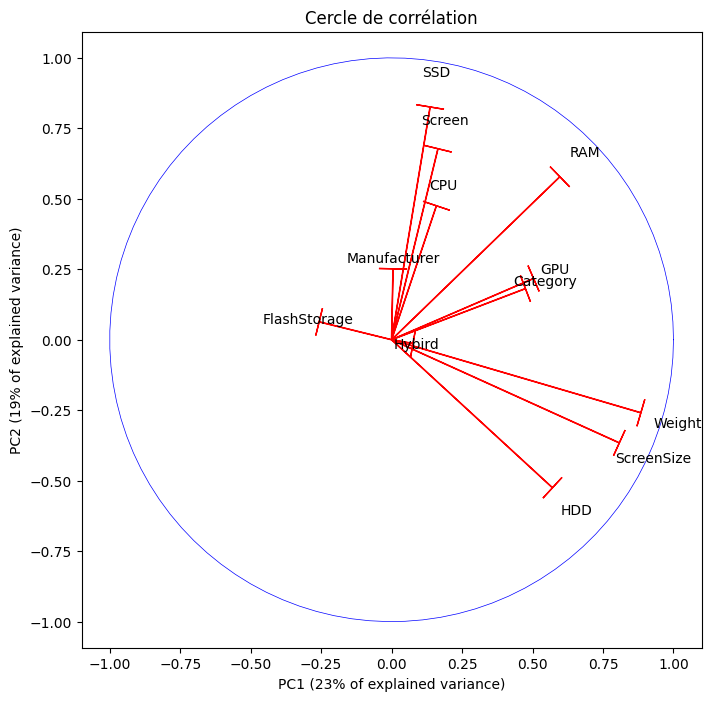

In [53]:
# Code cercle de corrélation

#on aura besoin de connaitre les nombre de ligne et de colonnes des données. 
#Pour les colonnes, on fait -1 parce que la colonne des codes postaux ne compte pas.
nlignes, ncol = laptop_data_quantified.shape
ncol = min(ncol - 1, pca.components_.shape[0])

#on définit les valeurs propres à partir de la variance expliquée
vpropres = pca.explained_variance_
sqrt_vpropres = np.sqrt(vpropres)

#on créée une matrice de corrélation  
corvar = np.zeros((ncol, ncol))

#on remplit la matrice
for k in range(ncol):
    corvar[:, k] = pca.components_[k, :] * sqrt_vpropres[k]
    

#on créée une figure vide pour le cercle de corrélation  
fig, ax = plt.subplots(figsize=(8, 8))

#on prépare un cercle unitaire
an = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(an), np.sin(an), 'b', linewidth=0.5) 

#on boucle sur les différences variables d'origine
for i in range(0, corvar.shape[0]):
    ax.arrow(0, 0,  # on trace les flèches depuis l'origine [0,0]
             corvar[i, 0],  #PC1
             corvar[i, 1], #PC2
             head_width=0.1,
             head_length=0,
             color = 'r')  
    #nom des variables au bout des flèches
    ax.text(corvar[i, 0]* 1.15, corvar[i, 1] * 1.15,
    feat_names[i], color = 'k', ha = 'center',
    va = 'center')

#on rajoute titres et légendes    
ax.axis('equal')
ax.set_xlabel("PC1 ({0}% of explained variance)".format(pc1, fontsize=12));
ax.set_ylabel("PC2 ({0}% of explained variance)".format(pc2, fontsize=12));
ax.set_title('Cercle de corrélation');

# Partie 3 : création du modèle
<a id='partie3'></a>

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

Séparation du dataset d'entrainement et du dataset de test, avec 20% des données alloués au test

In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(laptop_data_quantified[["Manufacturer", "Category", "ScreenSize", "Screen", "CPU", "RAM", "SSD", "HDD", "FlashStorage", "GPU", "Weight"]], laptop_data_quantified[["Price (Euros)"]], test_size=20)

In [56]:
regression = LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [58]:
xtrain.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,SSD,HDD,FlashStorage,GPU,Weight
1207,6,1,14.0,2073600,33,16.0,512,0,0,3,1.14
392,6,2,15.6,1049088,7,4.0,0,1000,0,27,1.90
243,5,2,15.6,2073600,4,4.0,0,1000,0,3,2.18
715,2,3,12.5,1049088,67,8.0,256,0,0,3,1.26
257,6,2,17.3,1440000,4,6.0,0,1000,0,50,2.80


In [59]:
ytrain.iloc[0]

Price (Euros)    2450.0
Name: 1207, dtype: float64

In [60]:
# Faire une prédiction
Manufacturer = [[1]]
Category = [[2]]
ScreenSize = [[10.7]]
Screen = [[2073600]]
CPU = [[10]]
RAM= [[16.0]]
SSD= [[256]]
HDD= [[2000]]
FlashStorage= [[0]]
GPU = [[3]]
Weight= [[2.4]]

X_pred = np.column_stack((Manufacturer, Category, ScreenSize, Screen, CPU, RAM, SSD, HDD, FlashStorage, GPU, Weight))

prix_predit = regression.predict(X_pred)

C:\Users\Zucc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
print (prix_predit)

[[1738.61603229]]


In [62]:
# Coefficients de la régression
results = {
 "label":["constante"]+list(xtrain.columns)+["Score"],
  "coeff": np.concatenate((regression.intercept_.reshape(1,-1), regression.coef_,regression.score(xtrain,ytrain)), axis=None),
}

pd.DataFrame(results)

,label,coeff
0,constante,443.567915
1,Manufacturer,8.976163
2,Category,43.028452
3,ScreenSize,-46.814775
4,Screen,0.000088
5,CPU,1.252085
6,RAM,58.148826
7,SSD,1.113069
8,HDD,-0.032342
9,FlashStorage,0.670717


In [63]:
final_pred = regression.predict(xtest)
r2_score(final_pred, ytest["Price (Euros)"])


0.7432323736312765

## Caractère signicatif conjoint des coefficients 

On calcule les caractéristiques en terme de SCE, SCR et SCT de cette régression. Le premier test d'hypothèse consiste à savoir le caractère significatif total de la régression. 

In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statistics

In [65]:
import statistics
#calcul de SCR
SCR =((prix_predit-regression.predict(X_pred))**2).sum() 
#calcul de SCT
SCT =((prix_predit-statistics.mean(prix_predit))**2).sum() 
#calcul de SCE
SCE =((regression.predict(X_pred)-statistics.mean(prix_predit))**2).sum() 
n = len(prix_predit)
p = X_pred.shape[1]
R = SCE/SCT; 
F = (SCE/p)/(SCR/(n-p-1))

results = {
 "label":["SCR"]+["SCE"]+["SCT"]+["Score R2"] + ["Fisher"],
  "coeff": np.concatenate((SCR, SCE,SCT, R, F),axis=None),
}

pd.DataFrame(results)

C:\Users\Zucc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


TypeError: can't convert type 'ndarray' to numerator/denominator